## Step 0. configurations

In [45]:
import warnings
warnings.filterwarnings("ignore")

## Step 1. reading data and importing libraries

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [47]:
df = pd.read_csv("./data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Step 2. understanding the data

In [48]:
df.shape

(569, 32)

In [49]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [50]:
df.index

RangeIndex(start=0, stop=569, step=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [52]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Step 3. Visualizing

In [53]:
numerical_columns = df.select_dtypes(include="number").columns \
    .drop("id")

numerical_columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [54]:
categorical_columns = df.select_dtypes(include="object").columns

categorical_columns

Index(['diagnosis'], dtype='object')

In [55]:
boolean_columns = df.select_dtypes(include="bool").columns
boolean_columns

Index([], dtype='object')

### **Distributions**

Numerical columns

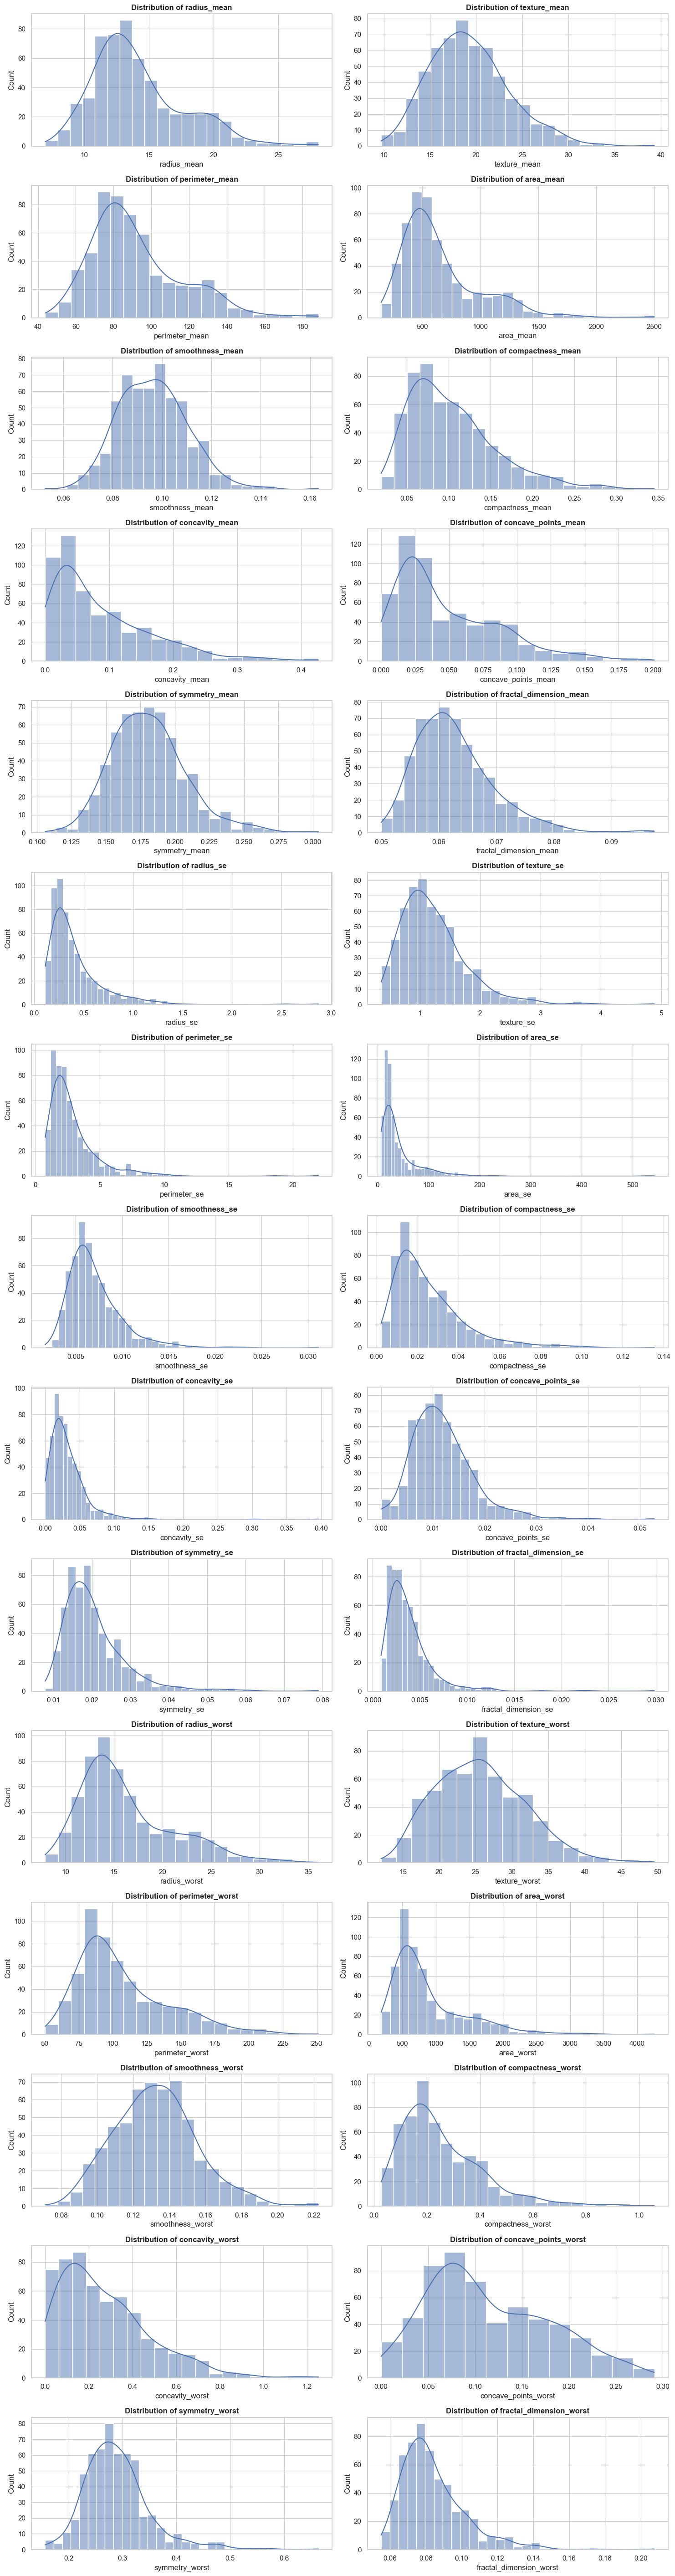

In [56]:
plt.figure(figsize=(15, 60))

for i, column in enumerate(numerical_columns):
    plt.subplot(len(df.columns)//2 + len(df.columns)%2, 2, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

Categorical columns

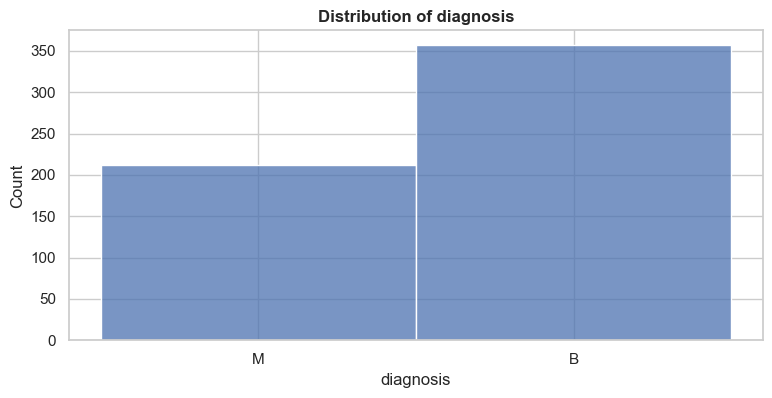

In [57]:
plt.figure(figsize=(15, 60))

for i, column in enumerate(categorical_columns):
    plt.subplot(len(df.columns)//2 + len(df.columns)%2, 2, i+1)
    sns.histplot(data=df, x=df[column])
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

Boolean columns

In [58]:
plt.figure(figsize=(15, 60))

for i, column in enumerate(boolean_columns):
    plt.subplot(len(df.columns)//2 + len(df.columns)%2, 2, i+1)
    sns.countplot(data=df, x=df[column])
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

<Figure size 1500x6000 with 0 Axes>

### **Correlations**

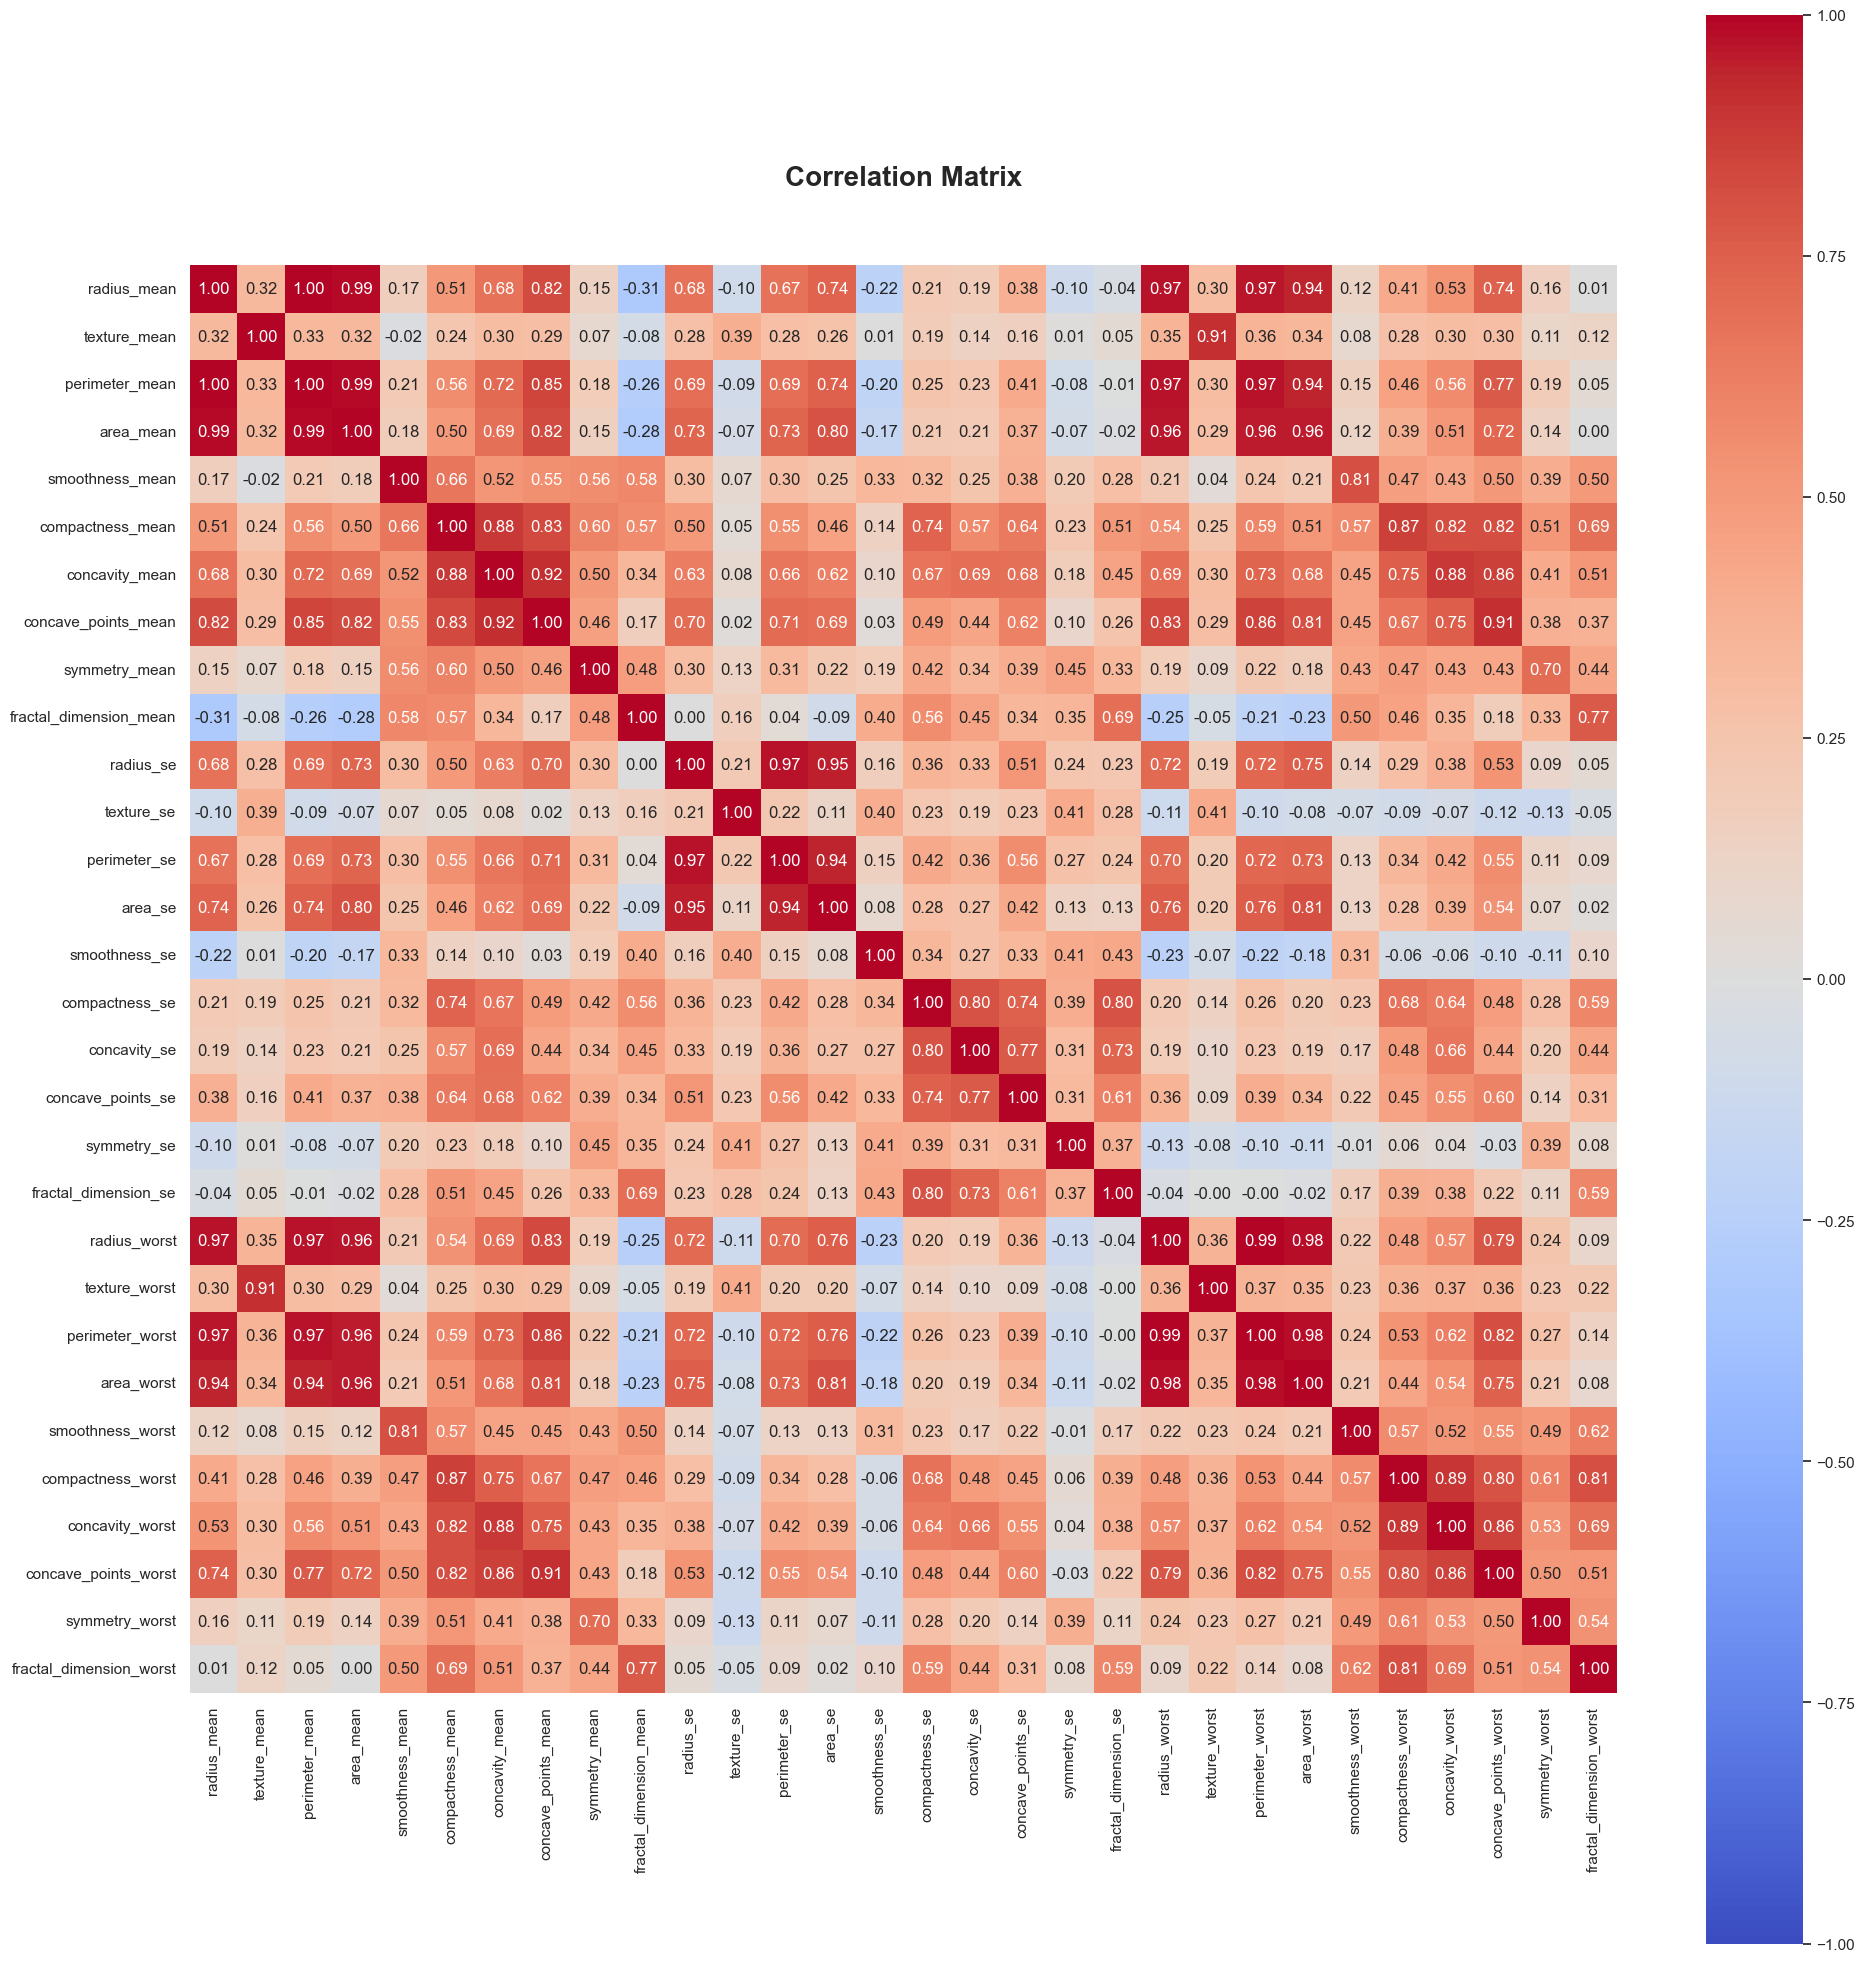

In [59]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, 
    annot=True, 
    square=True, 
    cmap="coolwarm", 
    fmt=".2f",
    vmin=-1, vmax=1
)
plt.title("Correlation Matrix", fontweight="bold", fontsize=20, y=1.05)

plt.tight_layout()
plt.show()

## Step 4: Modelling

The goal for this dataset is to create a classification model that can predict the column `diagnosis`

### Import modelling libraries

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


# Utility functions
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder


# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


### train_test_split

In [61]:
# # Use LabelEncoder to convert 'B' to 0 and 'M' to 1
# label_encoder = LabelEncoder()
# df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [62]:
X = df.drop(columns=["id", "diagnosis"])    # ID won't help in making a model
y = df["diagnosis"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### **KNeighborsClassifier()**

#### 1. Get the best parameters with **RandomizedSearchCV**

In [64]:
knn = KNeighborsClassifier()

param_dist = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': stats.randint(1, 11),
    'metric': ['minkowski', 'chebyshev', 'manhattan', 'euclidean', 'mahalanobis'],
    'n_neighbors': stats.randint(3, 10),
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
    'weights': ['uniform', 'distance'],
}

random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)
random_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000000461A98D0>,
                                        'metric': ['minkowski', 'chebyshev',
                                                   'manhattan', 'euclidean',
                                                   'mahalanobis'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000000004616A310>,
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=1)

In [65]:
best_params_knn = random_search_knn.best_params_
best_params_knn

{'algorithm': 'kd_tree',
 'leaf_size': 7,
 'metric': 'minkowski',
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

#### 2. Refined **GridSearchCV**

In [66]:
refined_param_grid = {
    'algorithm': [best_params_knn['algorithm']],
    'leaf_size': [best_params_knn['leaf_size'] - 1, best_params_knn['leaf_size'], best_params_knn['leaf_size'] + 1],
    'metric': [best_params_knn['metric']],
    'n_neighbors': [best_params_knn['n_neighbors'] - 1, best_params_knn['n_neighbors'], best_params_knn['n_neighbors'] + 1],
    'p': [best_params_knn['p']],
    'weights': [best_params_knn['weights']]
}

grid_search_knn_refined = GridSearchCV(knn, refined_param_grid, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)
grid_search_knn_refined.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['kd_tree'], 'leaf_size': [6, 7, 8],
                         'metric': ['minkowski'], 'n_neighbors': [5, 6, 7],
                         'p': [1], 'weights': ['distance']},
             scoring='accuracy', verbose=1)

#### 3. Get the best model and make predictions on the test set

In [67]:
best_knn = grid_search_knn_refined.best_estimator_
y_pred_knn = best_knn.predict(X_test)

#### 4. Evaluation

In [68]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, pos_label="M")
recall_knn = recall_score(y_test, y_pred_knn, pos_label="M")
f1_knn = f1_score(y_test, y_pred_knn, pos_label="M")

# pd.DataFrame({
#     "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
#     "Score": [accuracy_knn, precision_knn, recall_knn, f1_knn],
# })

In [69]:
print(f"Classification Report: \n {classification_report(y_test, y_pred_knn)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred_knn)}")

Classification Report: 
               precision    recall  f1-score   support

           B       0.94      0.96      0.95        69
           M       0.93      0.91      0.92        45

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix: 
 [[66  3]
 [ 4 41]]


### **RandomForestClassifier()**

#### 1. Get the best parameters with **RandomizedSearchCV**

In [70]:
rf = RandomForestClassifier()

param_dist = {
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(stats.randint(10, 30).rvs(2)),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': stats.randint(1, 5),
    'min_samples_split': stats.randint(2, 10),
    'n_estimators': stats.randint(50, 200),
}

random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 29, 18],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000000047A35510>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000000461A1A10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000000047948F10>},
                   scoring='accuracy', verbose=1)

In [71]:
best_params_rf = random_search_rf.best_params_
best_params_rf

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 175}

#### 2. Refined **GridSearchCV**

In [72]:
refined_param_grid = {
    'bootstrap': [best_params_rf['bootstrap']],
    'criterion': [best_params_rf['criterion']],
    'max_depth': [best_params_rf['max_depth'] - 2, best_params_rf['max_depth'], best_params_rf['max_depth'] + 2] if best_params_rf['max_depth'] is not None else [None],
    'max_features': [best_params_rf['max_features']],
    'min_samples_leaf': [best_params_rf['min_samples_leaf'] - 1, best_params_rf['min_samples_leaf'], best_params_rf['min_samples_leaf'] + 1],
    'min_samples_split': [best_params_rf['min_samples_split'] - 1, best_params_rf['min_samples_split'], best_params_rf['min_samples_split'] + 1],
    'n_estimators': [best_params_rf['n_estimators'] - 20, best_params_rf['n_estimators'], best_params_rf['n_estimators'] + 20],
}

grid_search_rf_refined = GridSearchCV(rf, refined_param_grid, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)
grid_search_rf_refined.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': [16, 18, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [155, 175, 195]},
             scoring='accuracy', verbose=1)

#### 3. Get the best model and make predictions on the test set

In [73]:
best_rf = grid_search_rf_refined.best_estimator_
y_pred_rf = best_rf.predict(X_test)

#### 4. Evaluation

In [74]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label="M")
recall_rf = recall_score(y_test, y_pred_rf, pos_label="M")
f1_rf = f1_score(y_test, y_pred_rf, pos_label="M")

# pd.DataFrame({
#     "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
#     "Score": [accuracy_rf, precision_rf, recall_rf, f1_rf],
# })

In [75]:
print(f"Classification Report: \n {classification_report(y_test, y_pred_rf)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred_rf)}")

Classification Report: 
               precision    recall  f1-score   support

           B       0.89      0.99      0.94        69
           M       0.97      0.82      0.89        45

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114

Confusion Matrix: 
 [[68  1]
 [ 8 37]]


### **DecisionTreeClassifier()**

#### 1. Get the best parameters with **RandomizedSearchCV**

In [76]:
dt = DecisionTreeClassifier()

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(stats.randint(1, 50).rvs(2)),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': stats.randint(1, 5),
    'min_samples_split': stats.randint(2, 10),
}

random_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=1000, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)
random_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 45, 45],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000000003F2285D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000000045028150>},
                   scoring='accuracy', verbose=1)

In [77]:
best_params_dt = random_search_dt    .best_params_
best_params_dt

{'criterion': 'gini',
 'max_depth': 45,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4}

#### 2. Refined **GridSearchCV**

In [78]:
refined_param_grid = {
    'criterion': [best_params_dt['criterion']],
    'max_depth': [best_params_dt['max_depth'] - 2, best_params_dt['max_depth'], best_params_dt['max_depth'] + 2] if best_params_dt['max_depth'] is not None else [None],
    'max_features': [best_params_dt['max_features']],
    'min_samples_leaf': [best_params_dt['min_samples_leaf'] - 1, best_params_dt['min_samples_leaf'], best_params_dt['min_samples_leaf'] + 1],
    'min_samples_split': [best_params_dt['min_samples_split'] - 1, best_params_dt['min_samples_split'], best_params_dt['min_samples_split'] + 1],
}

grid_search_dt_refined = GridSearchCV(dt, refined_param_grid, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)
grid_search_dt_refined.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [43, 45, 47],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [3, 4, 5]},
             scoring='accuracy', verbose=1)

#### 3. Get the best model and make predictions on the test set

In [79]:
best_dt = grid_search_dt_refined.best_estimator_
y_pred_dt = best_dt.predict(X_test)

#### 4. Evaluation

In [80]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, pos_label="M")
recall_dt = recall_score(y_test, y_pred_dt, pos_label="M")
f1_dt = f1_score(y_test, y_pred_dt, pos_label="M")

# pd.DataFrame({
#     "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
#     "Score": [accuracy_dt, precision_dt, recall_dt, f1_dt],
# })

In [81]:
print(f"Classification Report: \n {classification_report(y_test, y_pred_dt)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred_dt)}")

Classification Report: 
               precision    recall  f1-score   support

           B       0.89      0.97      0.93        69
           M       0.95      0.82      0.88        45

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.91      0.91       114

Confusion Matrix: 
 [[67  2]
 [ 8 37]]
